In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para a imagem original e para a imagem gradiente

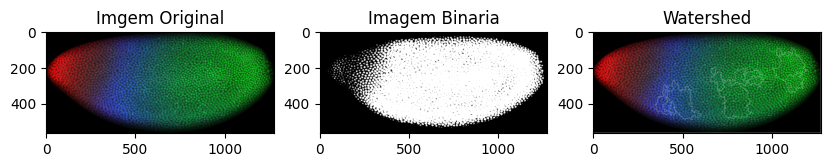

In [14]:
img1 = cv2.imread("img/image.jpg")
img1orig = cv2.imread("img/image.jpg")
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

def otsu(img):
        imgHist = np.histogram(img, bins=256, range=(0,255))[0]
        imgPint = imgHist*np.arange(256)
        imgHistParc = imgHist[:255]
        imgHistNorm = imgHist/np.sum(imgHist)
        variancia = np.zeros(256)
        for i in range(256):
                probFundo = np.sum(imgHistNorm[:i])
                probObj = 1-probFundo
                m1 = np.sum(imgPint[:i])/probFundo if probFundo>0 else 0
                m2 = np.sum(imgPint[i:])/probObj if probObj>0 else 0
                variancia[i] = probFundo*probObj*((m1-m2)**2)
        return imgHistParc, variancia

img4HistParc, img4Variancia = otsu(img1gray)
_, img1Binary = cv2.threshold(img1gray, np.argmax(img4Variancia), 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img1Binary,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img1,markers)
img1[markers == -1] = [255,255,255]

f, (axarr1, axarr2, axarr3)  = plt.subplots(1,3, figsize = (10,10))
axarr1.imshow(img1orig, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(img1Binary, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem Binaria")
axarr3.imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr3.title.set_text("Watershed")

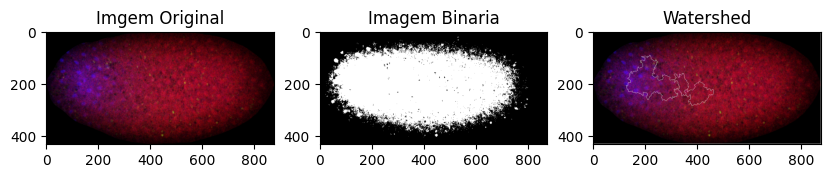

In [15]:
img1 = cv2.imread("img/image2.jpg")
img1orig = cv2.imread("img/image2.jpg")
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

def otsu(img):
        imgHist = np.histogram(img, bins=256, range=(0,255))[0]
        imgPint = imgHist*np.arange(256)
        imgHistParc = imgHist[:255]
        imgHistNorm = imgHist/np.sum(imgHist)
        variancia = np.zeros(256)
        for i in range(256):
                probFundo = np.sum(imgHistNorm[:i])
                probObj = 1-probFundo
                m1 = np.sum(imgPint[:i])/probFundo if probFundo>0 else 0
                m2 = np.sum(imgPint[i:])/probObj if probObj>0 else 0
                variancia[i] = probFundo*probObj*((m1-m2)**2)
        return imgHistParc, variancia

img4HistParc, img4Variancia = otsu(img1gray)
_, img1Binary = cv2.threshold(img1gray, np.argmax(img4Variancia), 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img1Binary,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img1,markers)
img1[markers == -1] = [255,255,255]

f, (axarr1, axarr2, axarr3)  = plt.subplots(1,3, figsize = (10,10))
axarr1.imshow(img1orig, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(img1Binary, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem Binaria")
axarr3.imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr3.title.set_text("Watershed")

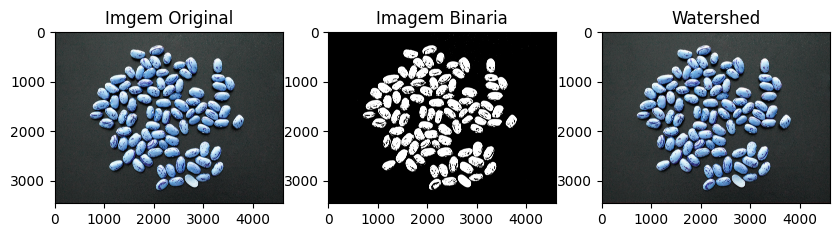

In [16]:
img1 = cv2.imread("img/feijao.jpg")
img1orig = cv2.imread("img/feijao.jpg")
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

def otsu(img):
        imgHist = np.histogram(img, bins=256, range=(0,255))[0]
        imgPint = imgHist*np.arange(256)
        imgHistParc = imgHist[:255]
        imgHistNorm = imgHist/np.sum(imgHist)
        variancia = np.zeros(256)
        for i in range(256):
                probFundo = np.sum(imgHistNorm[:i])
                probObj = 1-probFundo
                m1 = np.sum(imgPint[:i])/probFundo if probFundo>0 else 0
                m2 = np.sum(imgPint[i:])/probObj if probObj>0 else 0
                variancia[i] = probFundo*probObj*((m1-m2)**2)
        return imgHistParc, variancia

img4HistParc, img4Variancia = otsu(img1gray)
_, img1Binary = cv2.threshold(img1gray, np.argmax(img4Variancia), 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img1Binary,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img1,markers)
img1[markers == -1] = [255,0,0]

f, (axarr1, axarr2, axarr3)  = plt.subplots(1,3, figsize = (10,10))
axarr1.imshow(img1orig, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(img1Binary, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem Binaria")
axarr3.imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr3.title.set_text("Watershed")